# GEOS 505: Problem Set 3

### Background:

As part of your thesis, you are using a physics-based model to predict how the timing and amount of snow water storage in the Boise River Basin will change under alternative future scenarios of climate. You have your model up and running and presented preliminary results for the first time at a recent committee meeting. One of your committee members works with the Idaho NRCS snow survey and points out that your results would be more impactful if you could present them in the context of historical observations of snow water equivalent (SWE). In particular, your committee wants you to plot your simulations on top of historical SNOTEL climatology, presented as follows: 

<img src="../img/trinity_mtn-id-wteq-por.png" alt="Trinity Mtn. SNOTEL" width="1000" style="display: block; margin: 0 auto"/>

This figure, which can be generated on the NRCS website for any SNOTEL site and many water supply basins. This particular image is the 30 year "normals" for the 1991-2020 timeframe at Trinity Mountain SNOTEL site in the Upper Boise. The plot contains a water-year oriented plot of the following items:

- The median SWE vs time,
- The median maximum annual SWE on April 1, 
- The minimum SWE vs time,
- The maximum SWE vs time, and
- Filled in ranges for SWE quintiles (bottom 20%, 20-40%, 40-60%, 60-80%, and top 20%) vs time.

### Problem: 

Your hypothetical task for your thesis and the task for this problem set is to reproduce the above figure in a way that would allow you to analyze and plot historical data at a variety of SNOTEL sites, and in a way that would allow you to plot the corresponding version of this plot with simulated data for a future climate. As such, the expected outcome of this notebook is code that produces an image that looks similar to the above. You may certainly use an alternative color scheme, but make sure that the elements of the plot are labeled.

The outline of the steps is provided below, along with some helpful suggestions of `numpy` and `matplotlib` functions that you will likely need.

### 1. Imports and Definitions

In [2]:
from datetime import datetime
from dataretrieval import nwis
from metloom.pointdata import SnotelPointData
from metloom.variables import SnotelVariables

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

startDate = '1991-10-01'
endDate = '2020-09-30'

startDate_dt = datetime.strptime(startDate, '%Y-%m-%d')
endDate_dt = datetime.strptime(endDate, '%Y-%m-%d')

# Metloom Variables
snotel_stn = '830:ID:SNTL' # Trinity Mountain Snotel Station
snotel_pnt = SnotelPointData(station_id=snotel_stn, name='TrinityMtn')

variables = [snotel_pnt.ALLOWED_VARIABLES.SWE]

### 2. Load the Data and Verify

In [3]:
df_snotel = snotel_pnt.get_daily_data(startDate_dt, endDate_dt, variables)
df_snotel

,,geometry,SWE,SWE_units,datasource
datetime,site,,,,
1991-10-01 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,NRCS
1991-10-02 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,NRCS
1991-10-03 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,NRCS
1991-10-04 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,NRCS
1991-10-05 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,NRCS
...,...,...,...,...,...
2020-09-26 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,NRCS
2020-09-27 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,NRCS
2020-09-28 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,NRCS


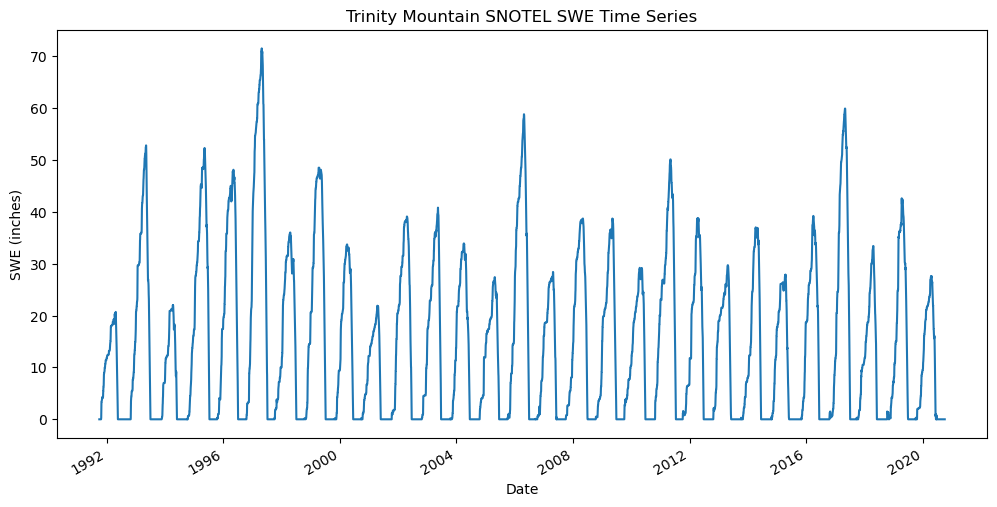

In [4]:
df_snotel.reset_index(level='site', inplace=True)
df_snotel['SWE'].plot(title='Trinity Mountain SNOTEL SWE Time Series', ylabel='SWE (inches)', xlabel='Date', figsize=(12,6))
plt.show()

In [5]:
#get rid of geometry, SWE_units, and datasource columns
df_snotel = df_snotel.drop(columns=['geometry', 'SWE_units', 'datasource'])
#make sure datetime column is in datetime format
df_snotel.index = pd.to_datetime(df_snotel.index)

#double check
df_snotel.head()

,site,SWE
datetime,,
1991-10-01 08:00:00+00:00,830:ID:SNTL,0.0
1991-10-02 08:00:00+00:00,830:ID:SNTL,0.0
1991-10-03 08:00:00+00:00,830:ID:SNTL,0.0
1991-10-04 08:00:00+00:00,830:ID:SNTL,0.0
1991-10-05 08:00:00+00:00,830:ID:SNTL,0.0


In [6]:
nYears = (endDate_dt.year - startDate_dt.year) + 1
print(nYears)

30


### 3. Prep Data and Preallocate Storage

In [7]:
swe_time_series = np.zeros((nYears, 365))
print(swe_time_series.shape)

(30, 365)


In [8]:
swe_dict = {} #store in a dictionary with years as keys and dataframes with days and SWEs
for year in range(startDate_dt.year, endDate_dt.year + 1): #for current year
    #start and end of current water year
    water_year_start = datetime(year, 10, 1)
    water_year_end = datetime(year + 1, 9, 30)

    #add UTC to match timestamp in snotel data
    water_year_start = pd.to_datetime(water_year_start).tz_localize('UTC')
    water_year_end = pd.to_datetime(water_year_end).tz_localize('UTC')

    #filter to water year
    df_year = df_snotel[(df_snotel.index >= water_year_start) & (df_snotel.index <= water_year_end)].copy()

    # Reset and create day index relative to Oct 1
    df_year = df_year.reset_index()
    df_year['day_of_water_year'] = (df_year['datetime'] - water_year_start).dt.days + 1  # 1 = Oct 1

    # Store
    swe_dict[year] = df_year[['day_of_water_year', 'SWE']]

### 4. Analyze Data

In [9]:
 #find the max, min, median,median maximum annual SWE on April 1st, and each 20th percentile
 #store in same dictionary
for year in swe_dict.keys(): #for each year
    df_year = swe_dict[year]
    for j in range(1, 366): #for each day of year
        if j in df_year['day_of_water_year'].values: #if day exists in df (leap years are a thing)
            swe_value = df_year[df_year['day_of_water_year'] == j]['SWE'].values[0]
            swe_time_series[year - startDate_dt.year, j - 1] = swe_value #store in array which is stored in dictionary
        else:
            swe_time_series[year - startDate_dt.year, j - 1] = np.nan

#maximum
swe_max = np.nanmax(swe_time_series, axis=0)
#minimum
swe_min = np.nanmin(swe_time_series, axis=0)
#0-20th percentile
swe_20th = np.nanpercentile(swe_time_series, 20, axis=0)
#20-40th percentile
swe_40th = np.nanpercentile(swe_time_series, 40, axis=0)
#40-60th percentile
swe_60th = np.nanpercentile(swe_time_series, 60, axis=0)
#60-80th percentile 
swe_80th = np.nanpercentile(swe_time_series, 80, axis=0)
#80-100th percentile
swe_100th = np.nanpercentile(swe_time_series, 100, axis=0)
#median
swe_median = np.nanpercentile(swe_time_series, 50, axis=0)

#median annual maximum SWE on April 1st
#combine all maximum annual SWE on April 1st into array
april_1_day = (datetime(2001, 4, 1) - datetime(2000, 10, 1)).days + 1 #use datetime to avoid leap year issues!!
april_1st_swe = []
for year in swe_dict.keys():
    df_year = swe_dict[year]
    if april_1_day in df_year['day_of_water_year'].values:
        swe_value = df_year[df_year['day_of_water_year'] == april_1_day]['SWE'].values[0]
 #swe value = swe for april 1st
        april_1st_swe.append(swe_value)

#arrange from lowest to highest
april_1st_swe = np.array(april_1st_swe)
april_1st_swe = np.sort(april_1st_swe)

#find median
swe_april_1st_median = np.median(april_1st_swe)

#make into array for plotting with median on april 1st
swe_april_1st_median_array = np.full((365,), np.nan)
swe_april_1st_median_array[90] = swe_april_1st_median #91st day is april 1st 


#add to dictionary
swe_dict['max'] = swe_max
swe_dict['min'] = swe_min
swe_dict['20th_percentile'] = swe_20th
swe_dict['40th_percentile'] = swe_40th
swe_dict['60th_percentile'] = swe_60th
swe_dict['80th_percentile'] = swe_80th
swe_dict['100th_percentile'] = swe_100th
swe_dict['median'] = swe_median
swe_dict['april_1st_median'] = swe_april_1st_median_array

### 5. Create Plot

Note: Here is a link to a list of named colors in matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html. 

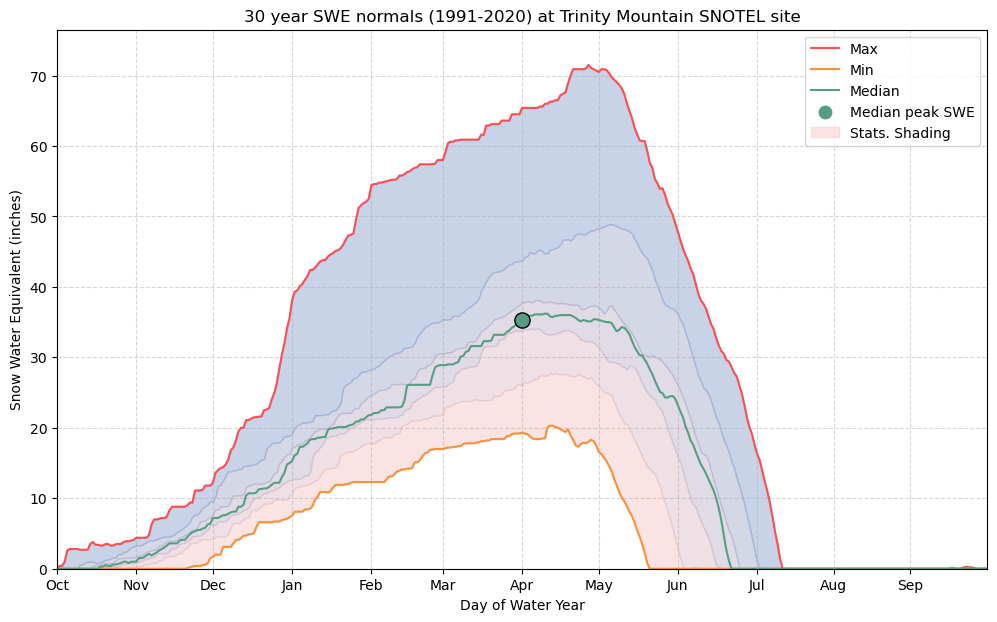

In [10]:
#days array to make plotting easier
days = np.arange(1, 366)

#plot min, max, median, max median april 1st SWE
plt.figure(figsize=(12,7))
plt.plot(days, swe_dict['max'], label='Max', color='#ff4e50')
plt.plot(days, swe_dict['min'], label='Min', color=('#fc913a'))
plt.plot(days, swe_dict['median'], label='Median', color='#559e83')
plt.scatter(april_1_day, swe_april_1st_median, color='black', zorder=5, marker='o', s=120)
plt.scatter(april_1_day, swe_april_1st_median, color='#559e83', label='Median peak SWE', zorder=5, marker='o', s=80)

#percent ranges
plt.fill_between(days, swe_dict['min'], swe_dict['20th_percentile'], color='#f7cac9', alpha=0.5, label='Stats. Shading')
plt.fill_between(days, swe_dict['20th_percentile'], swe_dict['40th_percentile'], color='#dec2cb', alpha=0.5)
plt.fill_between(days, swe_dict['40th_percentile'], swe_dict['60th_percentile'], color='#c5b9cd', alpha=0.5)
plt.fill_between(days, swe_dict['60th_percentile'], swe_dict['80th_percentile'], color='#abb1cf', alpha=0.5)
plt.fill_between(days, swe_dict['80th_percentile'], swe_dict['100th_percentile'], color='#92a8d1', alpha=0.5)

plt.title('30 year SWE normals (1991-2020) at Trinity Mountain SNOTEL site')
plt.xlabel('Day of Water Year')
plt.ylabel('Snow Water Equivalent (inches)')
plt.ylim(0, np.max(swe_dict['max']) + 5)
plt.xlim(1, 365)
plt.legend()
plt.grid(linestyle='--', alpha=0.5)

#month labels
month_labels = ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
month_days = np.cumsum([0,31,30,31,31,28,31,30,31,31,30,30]) + 1  # approx days since Oct 1
plt.xticks(month_days, month_labels)

plt.show()